In [1]:
import gensim
import fasttext.util #pip install fasttext
import pandas as pd
import numpy as np
import fasttext

C:\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

ImportError: cannot import name 'balanced_accuracy_score'

### read the mordality norms datasets downloaded from : https://github.com/bodowinter/affect_modality
There are 3 seperate files corresponding to verbs, nouns and adjcetives.

These files contain words and their corresponding perceptual strength(Auditory, Visual, Haptic, Gustatory and olfactory) collected by asking many participants. We will consider these files as reference files and will use them to compare to compare the efficacy of our proposed method. Details can be found in [Bodo Winter, 2016, Taste and smell words form an affectively loaded and emotionally flexible part of the English lexicon]

We will also attempt to use The Lancaster Sensorimotor Norms for 40k words as reference.  https://link.springer.com/article/10.3758/s13428-019-01316-z 

We will use word embedding based approach to calculate the sensory scores. Two set of pre-trained embeddings have been used
* Fasttext https://fasttext.cc/docs/en/crawl-vectors.html
* Google news https://code.google.com/archive/p/word2vec/ 





In [3]:

form = 'adj'

if form == 'verb':
    data= pd.read_csv('winter_2015_verb_norms.csv')
elif form == 'adj':
    data = pd.read_csv('lynott_connell_2009_adj_norms.csv')
elif form == 'noun':
    data = pd.read_csv('lynott_connell_2013_noun_norms.csv')
elif form == 'all':
    data= pd.read_csv('winter_lynott_verb_adj_noun.csv')
elif form == 'sensori':
    data= pd.read_csv('Sensorimotor_norms_25Jan2020.csv')
    data.rename(columns={"Auditory.mean": "AuditoryStrengthMean", "Gustatory.mean": "GustatoryStrengthMean", 
                    "Haptic.mean":"HapticStrengthMean", "Olfactory.mean":"OlfactoryStrengthMean",
                     "Visual.mean":"VisualStrengthMean" }, inplace=True)

print(data.shape)
words=data['Word'].values.tolist()# words for which perceptual strength will be calculated


data.head()

(423, 9)


,PropertyBritish,Word,DominantModality,VisualStrengthMean,HapticStrengthMean,AuditoryStrengthMean,GustatoryStrengthMean,OlfactoryStrengthMean,ModalityExclusivity
0,abrasive,abrasive,Haptic,2.894737,3.684211,1.684211,0.578947,0.578947,0.329609
1,absorbent,absorbent,Visual,4.142857,3.142857,0.714286,0.476190,0.476190,0.409574
2,aching,aching,Haptic,2.047619,3.666667,0.666667,0.047619,0.095238,0.554745
3,acidic,acidic,Gustatory,2.190476,1.142857,0.476190,4.190476,2.904762,0.340611
4,acrid,acrid,Olfactory,1.125000,0.625000,0.375000,3.000000,3.500000,0.362319


In [4]:
data.columns

Index(['PropertyBritish', 'Word', 'DominantModality', 'VisualStrengthMean',
       'HapticStrengthMean', 'AuditoryStrengthMean', 'GustatoryStrengthMean',
       'OlfactoryStrengthMean', 'ModalityExclusivity'],
      dtype='object')

In [5]:
data = data.drop(['PropertyBritish'], axis=1)
data = data.set_index('Word', drop = True)
data

,DominantModality,VisualStrengthMean,HapticStrengthMean,AuditoryStrengthMean,GustatoryStrengthMean,OlfactoryStrengthMean,ModalityExclusivity
Word,,,,,,,
abrasive,Haptic,2.894737,3.684211,1.684211,0.578947,0.578947,0.329609
absorbent,Visual,4.142857,3.142857,0.714286,0.476190,0.476190,0.409574
aching,Haptic,2.047619,3.666667,0.666667,0.047619,0.095238,0.554745
acidic,Gustatory,2.190476,1.142857,0.476190,4.190476,2.904762,0.340611
acrid,Olfactory,1.125000,0.625000,0.375000,3.000000,3.500000,0.362319
adhesive,Haptic,3.666667,4.333333,1.190476,0.904762,1.761905,0.289157
alcoholic,Gustatory,2.850000,0.350000,0.750000,4.350000,4.300000,0.317460
alive,Visual,4.571429,3.809524,4.095238,1.571429,2.380952,0.182609
amber,Visual,4.476190,0.523810,0.142857,0.571429,0.857143,0.659420


## seed words which will be mapped to different modalities

The words were selected from Bodo Winter, 2016 paper. He used these words for creating dictionary of verbs. We can experiment with different words for nouns and adjectives but it doesnt work well. we are taking the basic verb words i.e. see, hear, touch, taste and smell. 

### verbs
* Visual -> ['see', 'look']
* Auditory -> ['hear', 'listen', 'sound']
* Haptic -> ['feel', 'touch']
* Olfactory -> ['smell']
* Gustatory ->['taste']

### adjectives
* Visual ->['bright']
* Auditory -> ['barking']
* Haptic -> ['smooth']
* Olfactory -> ['fragrant']
* Gustatory -> ['citrusy']

### nouns 
* Visual -> ['reflection']
* Auditory -> ['sound']
* Haptic -> ['hold']
* Olfactory -> ['air', 'breath']
* Gustatory -> ['taste']



In [6]:

percept_seed2percept_cat = {'Visual':['see', 'look'], 'Auditory': ['hear','listen','sound'], 
                            'Haptic': ['feel', 'touch'], 'Gustatory': ['taste'], 'Olfactory': ['smell']} # well with adjectives and nouns

#percept_seed2percept_cat = {'Visual':['see'], 'Auditory': ['hear'], 
#                            'Haptic': [ 'touch'], 'Gustatory': ['taste'], 'Olfactory': ['smell']} # performs well with verbs

#percept_seed2percept_cat = {'Visual':['bright'], 'Auditory': ['barking'], 
#                            'Haptic': [ 'smooth'], 'Gustatory': ['citrusy'], 'Olfactory': ['fragrant']}  # adj, but worse than the full verb list

#percept_seed2percept_cat = {'Visual':['reflection'], 'Auditory': ['sound'], 
#           'Haptic': [ 'hold'], 'Gustatory': ['taste'], 'Olfactory': ['air', 'breath']} # noun but worse than full verb list


mapwords={}
for k,vlist in percept_seed2percept_cat.items():
    for v in vlist:
        mapwords[v] = k

perceptual_seedwords = list(mapwords.keys())

mapwords, perceptual_seedwords

({'feel': 'Haptic',
  'hear': 'Auditory',
  'listen': 'Auditory',
  'look': 'Visual',
  'see': 'Visual',
  'smell': 'Olfactory',
  'sound': 'Auditory',
  'taste': 'Gustatory',
  'touch': 'Haptic'},
 ['listen', 'see', 'touch', 'feel', 'smell', 'hear', 'taste', 'look', 'sound'])

In [7]:
# to calculate cosine similarity between 2 vectors
def similarity(v1, v2):
    n1 = np.linalg.norm(v1)
    n2 = np.linalg.norm(v2)
    return np.dot(v1, v2) / n1 / n2

## read pre-trained models 
### fasttext

In [8]:
#model = fasttext.train_supervised(input="cooking.train")
#fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')


### calculate cosine similarity between perceptual seed words and words.
sim_df_ft dataframe

In [63]:
add_vectors=False
if add_vectors:
    sim_df_ft = pd.DataFrame(index= words, dtype= 'float')
    for word in words:
        v1 = ft.get_word_vector(word)
        v2 = np.zeros(v1.shape)
        for perceptlist in percept_seed2percept_cat.values():
            for percept in perceptlist:
                v2+=ft.get_word_vector(percept)
            v2= np.divide(v2, len(perceptlist))
            sim_df_ft.loc[word, percept] = similarity(v1, v2) 
                

else:
    sim_df_ft = pd.DataFrame(index= words, columns = perceptual_seedwords, dtype= 'float')
    for word in words:
        for percept in perceptual_seedwords:    
            v1 = ft.get_word_vector(word)
            v2 = ft.get_word_vector(percept)
            sim_df_ft.loc[word, percept] = similarity(v1, v2)
sim_df_ft       

,sound,smell,see,taste,hear,look,touch,listen,feel
abrasive,0.267560,0.115839,-0.025544,0.138532,0.129588,0.056760,0.172454,0.196421,0.186331
absorbent,0.127456,0.212867,-0.048023,0.109968,0.035628,0.076433,0.158682,-0.029664,0.113974
aching,0.143028,0.165108,0.105631,0.150557,0.205617,0.129979,0.242876,0.137786,0.348631
acidic,0.193860,0.260999,-0.019996,0.313436,0.033611,0.046048,0.171577,0.037176,0.170181
acrid,0.256233,0.501199,0.003705,0.431422,0.132473,0.063358,0.192981,0.050316,0.189565
adhesive,0.099936,0.136181,-0.000053,0.073237,-0.031184,0.033135,0.218042,-0.003600,0.076590
alcoholic,0.084083,0.136817,-0.015680,0.203422,0.023446,-0.002299,0.105099,0.031016,0.128363
alive,0.146062,0.167809,0.185438,0.112304,0.204485,0.146347,0.258269,0.143262,0.268474
amber,0.168095,0.269470,0.039433,0.227885,0.016990,0.132655,0.214787,0.056796,0.086364
angular,0.193483,0.044216,0.063358,0.098159,0.049978,0.188523,0.168545,0.011303,0.101483


In [55]:
sim_df_ft.corr()

,sound,smell,see,taste,hear,look,touch,listen,feel
sound,1.000000,0.231026,0.077479,0.056121,0.793362,-0.024528,0.021184,0.732440,0.285583
smell,0.231026,1.000000,-0.238401,0.676300,0.198143,-0.188738,0.223980,0.026541,0.284379
see,0.077479,-0.238401,1.000000,-0.316833,0.339940,0.688062,-0.048483,0.296531,0.240262
taste,0.056121,0.676300,-0.316833,1.000000,-0.086364,-0.081739,0.373698,-0.126090,0.282827
hear,0.793362,0.198143,0.339940,-0.086364,1.000000,-0.026997,-0.131456,0.893280,0.326386
look,-0.024528,-0.188738,0.688062,-0.081739,-0.026997,1.000000,0.222694,-0.013305,0.319740
touch,0.021184,0.223980,-0.048483,0.373698,-0.131456,0.222694,1.000000,-0.067923,0.429921
listen,0.732440,0.026541,0.296531,-0.126090,0.893280,-0.013305,-0.067923,1.000000,0.321046
feel,0.285583,0.284379,0.240262,0.282827,0.326386,0.319740,0.429921,0.321046,1.000000


In [57]:
def prepare_data(sim_df, data, mapwords):
    
    columns = ['VisualStrengthMean', 'HapticStrengthMean', 'AuditoryStrengthMean', 'OlfactoryStrengthMean',
       'GustatoryStrengthMean']
    
    sim_df = pd.concat([sim_df, pd.DataFrame(columns = columns)], sort=False)
    
    sim_df[columns] = data[columns].apply(pd.to_numeric).values
    
    
    return sim_df 


def add_dominantmod(sim_df, data,perceptual_seedwords):
           
    sim_df['DM_word2vec'] = sim_df[perceptual_seedwords].idxmax(axis=1).apply(lambda x: mapwords[x])
    print(sim_df.groupby("DM_word2vec").idxmax())

    print(sim_df.groupby("DM_word2vec").mean())
    if 'DominantModality' in data.columns:
        print('Dominant Modality exists in reference data \n ')
    else:
        data['DominantModality'] = data[['VisualStrengthMean', 'HapticStrengthMean', 'AuditoryStrengthMean', 'OlfactoryStrengthMean',
           'GustatoryStrengthMean']].idxmax(axis=1).apply(lambda x: x.replace('StrengthMean', ''))
        print('Calculated dominant modality in reference data and added as a new column to data' )
    
    #sim_df['DominantModality'] = data['DominantModality'].values
    print('Dominant modality count as per word2vec\n', sim_df['DM_word2vec'].value_counts())
    print('Dominant modailty count as per reference data \n ', data['DominantModality'].value_counts())
    return sim_df, data
    
    
def normdata(df,data, perceptual_seedwords, preprocess):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
    
    columns_ref = ['VisualStrengthMean', 'HapticStrengthMean', 'AuditoryStrengthMean', 'OlfactoryStrengthMean',
       'GustatoryStrengthMean']
   
    
    #
    if preprocess ==1:
        data[columns_ref] = normalize(data[columns_ref].values, norm='l2')
        df[perceptual_seedwords]= normalize(df[perceptual_seedwords], norm='l2')
    elif preprocess == 2:
        data[columns_ref]  = StandardScaler().fit_transform(data[columns_ref].values)
        df[perceptual_seedwords]= StandardScaler().fit_transform(df[perceptual_seedwords])
        
    #temp1= normalize(temp, norm='l2')
    
    return df, data

In [77]:
preprocess= 2
#sim_df_ft = prepare_data(sim_df_ft,data, mapwords)
temp_df, temp_data = normdata(sim_df_ft,data, perceptual_seedwords, preprocess )
#temp=sim_df_ft
sim_df_ft_final, data_final = add_dominantmod(temp_df, temp_data,perceptual_seedwords)

sim_df_ft_final.isnull().sum()

                  feel      hear   listen       look      see    smell  \
DM_word2vec                                                              
Auditory        mellow      loud  blaring     cheesy  whining  hissing   
Gustatory    delicious     nutty  honeyed  delicious    nutty    minty   
Haptic           happy     happy    happy      happy    happy   earthy   
Olfactory        fishy  snorting  flowery      fishy    fishy  odorous   
Visual          little   strange     hard     little   little    faint   

               sound    taste    touch  
DM_word2vec                             
Auditory     muffled  insipid     mute  
Gustatory      nutty    salty  buttery  
Haptic         crisp    sweet     warm  
Olfactory      fishy  pungent  scented  
Visual       strange    fresh  elegant  
                sound     smell       see     taste      hear      look  \
DM_word2vec                                                               
Auditory     1.330690 -0.104645  0.042100 -0

sound          0
smell          0
see            0
taste          0
hear           0
look           0
touch          0
listen         0
feel           0
DM_word2vec    0
dtype: int64

In [79]:
data_final

,DominantModality,VisualStrengthMean,HapticStrengthMean,AuditoryStrengthMean,GustatoryStrengthMean,OlfactoryStrengthMean,ModalityExclusivity
Word,,,,,,,
abrasive,Haptic,-0.583343,0.959524,0.128767,-0.464981,-0.447527,0.329609
absorbent,Visual,0.494124,0.620250,-0.479128,-0.529868,-0.516404,0.409574
aching,Haptic,-1.314636,0.948529,-0.508973,-0.800492,-0.771755,0.554745
acidic,Gustatory,-1.191312,-0.633177,-0.628353,1.815546,1.111456,0.340611
acrid,Olfactory,-2.111108,-0.957726,-0.691773,1.063811,1.510441,0.362319
adhesive,Haptic,0.083042,1.366338,-0.180678,-0.259243,0.345404,0.289157
alcoholic,Gustatory,-0.621963,-1.130072,-0.456744,1.916278,2.046678,0.317460
alive,Visual,0.864098,1.038059,1.639864,0.161729,0.760349,0.182609
amber,Visual,0.781882,-1.021143,-0.837268,-0.469729,-0.261054,0.659420


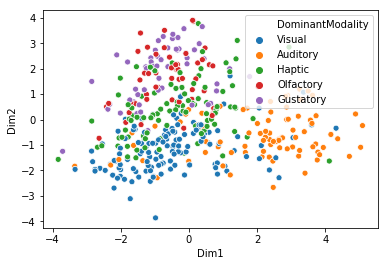

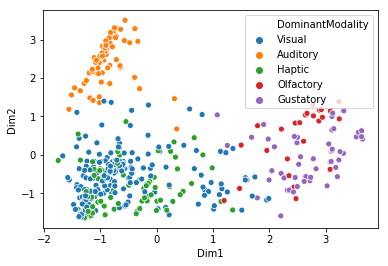

In [80]:
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import seaborn as sns
#from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns
#plotvar = region2spiceingre_df_combined.T




def myplot(plotvar, color_label):
    n_components=3
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(plotvar)
    
    plot_df = pd.DataFrame(principalComponents[:,[0,1]], columns=['Dim1', 'Dim2'])
    plot_df['DominantModality'] = color_label.values
    sns.scatterplot(x='Dim1', y='Dim2', data = plot_df, hue= 'DominantModality', 
                    hue_order =['Visual', 'Auditory',  'Haptic', 'Olfactory', 'Gustatory'])
    
      

plotvar = sim_df_ft_final[perceptual_seedwords]
color_label = sim_df_ft_final['DM_word2vec']
myplot(plotvar, color_label)
plt.show()

plotvar = data_final[['VisualStrengthMean', 'HapticStrengthMean', 'AuditoryStrengthMean', 'OlfactoryStrengthMean',
       'GustatoryStrengthMean']]
color_label = data_final['DominantModality']
myplot(plotvar, color_label)
plt.show()


### Modality exclusivity

In [82]:
def cal_modalityExclusivity(df):
    exc = (df.max() -df.min())/df.sum()
    return exc
    
    
sim_df_ft_final['ModalityExclusivity_word2vec'] = sim_df_ft_final[perceptual_seedwords].apply(lambda x:cal_modalityExclusivity(x), axis=1)
sim_df_ft_final


,sound,smell,see,taste,hear,look,touch,listen,feel,DM_word2vec,ModalityExclusivity_word2vec
abrasive,0.580702,-0.796793,-1.740692,-0.421604,-0.022674,-1.393422,-0.069035,1.353811,0.388016,Auditory,-1.458508
absorbent,-0.826206,0.061429,-2.084128,-0.706375,-0.865441,-1.117518,-0.278592,-1.223105,-0.745311,Olfactory,-0.275593
aching,-0.669838,-0.361008,0.263426,-0.301721,0.659255,-0.366544,1.002527,0.685488,2.930126,Haptic,0.937073
acidic,-0.159391,0.487153,-1.655930,1.322096,-0.883534,-1.543658,-0.082385,-0.461259,0.135062,Gustatory,-1.047919
acrid,0.466951,2.611728,-1.293817,2.498354,0.003198,-1.300892,0.243307,-0.311488,0.438676,Olfactory,1.165852
adhesive,-1.102555,-0.616866,-1.351228,-1.072564,-1.464712,-1.724768,0.624649,-0.926028,-1.330858,Haptic,-0.262068
alcoholic,-1.261754,-0.611237,-1.589990,0.225311,-0.974707,-2.221721,-1.093939,-0.531470,-0.519932,Gustatory,-0.285220
alive,-0.639372,-0.337112,1.482730,-0.683085,0.649103,-0.136980,1.236755,0.747903,1.674624,Haptic,0.590229
amber,-0.418112,0.562084,-0.747953,0.469198,-1.032615,-0.329007,0.575112,-0.237627,-1.177761,Haptic,-0.750155
angular,-0.163170,-1.430300,-0.382425,-0.824101,-0.736732,0.454532,-0.128513,-0.756157,-0.940959,Visual,-0.384046


### calculate performance measures. Compare the scores generated by our proposed method with reference scores

In [83]:

def calc_perf(ytest, ypred):
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
    
    print('balanced accuracy score\n', balanced_accuracy_score( ytest, ypred))
    print('confusion matrix\n', confusion_matrix( ytest, ypred,labels = ['Visual', 'Auditory',
                                                                                  'Haptic', 'Olfactory', 'Gustatory']))
    print('classification report \n',classification_report(ytest, ypred))
    #fpr, tpr = roc_curve(sim_df['DominantModality'], sim_df['DM_word2vec'])
    #plt.plot(fpr, tpr)
    from sklearn.preprocessing import label_binarize
    label_binarize([1, 6], classes=[1, 2, 4, 6])
    y_test_binary = label_binarize(ytest.values, classes =['Visual', 'Auditory','Haptic', 'Olfactory', 'Gustatory'] )
                                                                                  
    y_prob_binary = label_binarize(ypred.values, classes =['Visual', 'Auditory','Haptic', 'Olfactory', 'Gustatory'] )
    
    '''                                                                             
    macro_roc_auc_ovo = roc_auc_score(y_test_binary, y_prob_binary, multi_class="ovo",
                                  average="macro")
    weighted_roc_auc_ovo = roc_auc_score(y_test_binary, y_prob_binary, multi_class="ovo",
                                         average="weighted")
    macro_roc_auc_ovr = roc_auc_score(y_test_binary, y_prob_binary, multi_class="ovr",
                                      average="macro")
    weighted_roc_auc_ovr = roc_auc_score(y_test_binary, y_prob_binary, multi_class="ovr",
                                         average="weighted")
    print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))
    
    '''
ytest= data_final['DominantModality']
ypred = sim_df_ft_final['DM_word2vec']
calc_perf(ytest, ypred)

ImportError: cannot import name 'balanced_accuracy_score'

## repeat with google tre-trained model

In [ ]:
import gensim.models.keyedvectors as word2vec
model = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


### calculate cosine similarity between perceptual seed words and words.
sim_df_google dataframe

In [ ]:
add_vectors=False
if add_vectors:
    sim_df_google = pd.DataFrame(index= words, dtype= 'float')
    for word in words:
        if word in model.vocab:
            v1 = model.get_vector(word)
            v2 = np.zeros(v1.shape)
            for perceptlist in percept_seed2percept_cat.values():
                for percept in perceptlist:
                        v2+=model.get_vector(percept)
        
                v2= np.divide(v2, len(perceptlist))
                sim_df_google.loc[word, percept] = similarity(v1, v2)
        else:
            print('word not found', word)
            sim_df_google.loc[word, percept] = 0
                
else:

    sim_df_google = pd.DataFrame(index= words, columns = perceptual_seedwords, dtype= 'float')
    for word in words:
        for percept in perceptual_seedwords:    
            if (word in model.vocab) & (percept in model.vocab):
                v1 = model.get_vector(word)
                v2 = model.get_vector(percept)
                sim_df_google.loc[word, percept] = similarity(v1, v2)
            else:
                print('words not found', word, percept)
                sim_df_google.loc[word, percept] = 0

sim_df_google 

In [ ]:
# prepare data
sim_df_google.isnull().sum()
sim_df_google = prepare_data(sim_df_google, mapwords)


In [ ]:
# calculate performance
calc_perf(sim_df_google)

In [ ]:
import seaborn as sns
sns.regplot(x='OlfactoryStrengthMean', y= 'smell', data=sim_df)

In [ ]:
from sklearn.metrics import r2_score
from numpy import cov
cov(  sim_df['GustatoryStrengthMean'], sim_df['taste'])